In [21]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

#To display all columns
pd.set_option('display.max_columns', None)

#To display all rows
#pd.set_option('display.max_rows', None)

In [22]:
# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [23]:
# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [24]:
# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


#Download BTC data from the link below

https://finance.yahoo.com/quote/BTC-USD/history?period1=1489708800&period2=1679011200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [25]:
data = pd.read_csv('BTC-USD.csv')
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-17,1180.160034,1180.160034,1099.569946,1100.229980,1100.229980,7.065990e+08
1,2017-03-18,1099.689941,1114.069946,957.655029,973.817993,973.817993,6.213020e+08
2,2017-03-19,976.729980,1069.910034,976.729980,1036.739990,1036.739990,4.066480e+08
3,2017-03-20,1037.239990,1063.030029,1036.680054,1054.229980,1054.229980,2.865300e+08
4,2017-03-21,1055.359985,1122.430054,1055.359985,1120.540039,1120.540039,3.373910e+08
...,...,...,...,...,...,...,...
2187,2023-03-13,22156.406250,24550.837891,21918.199219,24197.533203,24197.533203,4.946636e+10
2188,2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219,24746.074219,5.462223e+10
2189,2023-03-15,24770.925781,25240.615234,23964.910156,24375.960938,24375.960938,4.365570e+10
2190,2023-03-16,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2192 non-null   object 
 1   Open       2191 non-null   float64
 2   High       2191 non-null   float64
 3   Low        2191 non-null   float64
 4   Close      2191 non-null   float64
 5   Adj Close  2191 non-null   float64
 6   Volume     2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 120.0+ KB


In [27]:
# Function to check the columns
def check_columns(df):
    column = pd.DataFrame()
    col_name = []
    is_unique = []
    is_null = []
    duplicates = []

    for i in df.columns:
    
        col_name.append(i)
        is_unique.append(df[i].is_unique)
        is_null.append(df[i].isnull().sum())
        duplicates.append(df[i].duplicated().any())



    column['col_name'] = col_name
    column['is_unique'] = is_unique
    column['is_null'] = is_null
    column['duplicates'] = duplicates

    return column  

check_columns(data)

,col_name,is_unique,is_null,duplicates
0,Date,True,0,False
1,Open,False,1,True
2,High,False,1,True
3,Low,True,1,False
4,Close,False,1,True
5,Adj Close,False,1,True
6,Volume,True,1,False


In [28]:
#Drop the column which contains null values
#data.drop([2190], axis=0, inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data[data.Open.isnull()]


,Date,Open,High,Low,Close,Adj Close,Volume


In [29]:
#Set date column as index
data.index = pd.to_datetime(data['Date'])
data.drop('Date', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-17,1180.160034,1180.160034,1099.569946,1100.229980,1100.229980,7.065990e+08
2017-03-18,1099.689941,1114.069946,957.655029,973.817993,973.817993,6.213020e+08
2017-03-19,976.729980,1069.910034,976.729980,1036.739990,1036.739990,4.066480e+08
2017-03-20,1037.239990,1063.030029,1036.680054,1054.229980,1054.229980,2.865300e+08
2017-03-21,1055.359985,1122.430054,1055.359985,1120.540039,1120.540039,3.373910e+08
...,...,...,...,...,...,...
2023-03-12,20628.029297,22185.031250,20448.806641,22163.949219,22163.949219,2.927904e+10
2023-03-13,22156.406250,24550.837891,21918.199219,24197.533203,24197.533203,4.946636e+10
2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219,24746.074219,5.462223e+10


Text(0.5, 0, 'Date')

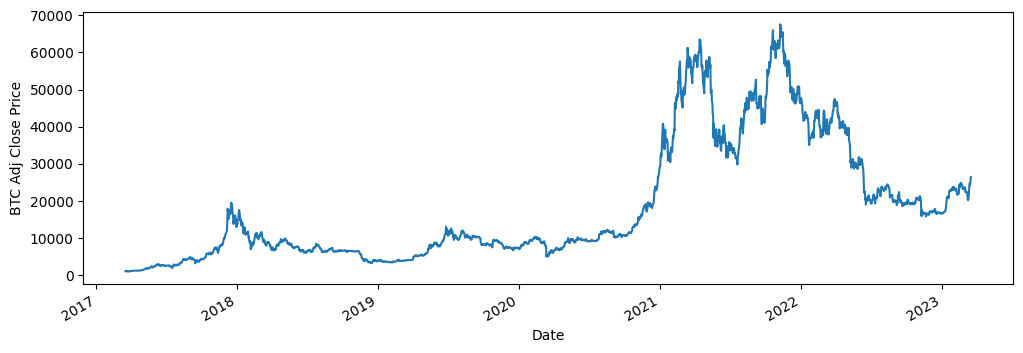

In [30]:
#Plot the graph between  Adj close and Years

data['Adj Close'].plot(figsize=(12,4))
plt.ylabel('BTC Adj Close Price')
plt.xlabel('Date')

### EDA

In [31]:
#Average closing btc price for every year

print("The mean of BTC close price between years 2017 to 2018 is => {}".format(data.loc[(data.index >= '2017-03-17') & (data.index <='2018-03-17'), 'Close'].mean()))
print("The mean of BTC close price between years 2018 to 2019 is => {}".format(data.loc[(data.index >= '2018-03-17') & (data.index <='2019-03-17'), 'Close'].mean()))
print("The mean of BTC close price between years 2019 to 2020 is => {}".format(data.loc[(data.index >= '2019-03-17') & (data.index <='2020-03-17'), 'Close'].mean()))
print("The mean of BTC close price between years 2020 to 2021 is => {}".format(data.loc[(data.index >= '2020-03-17') & (data.index <='2021-03-17'), 'Close'].mean()))
print("The mean of BTC close price between years 2021 to 2022 is => {}".format(data.loc[(data.index >= '2021-03-17') & (data.index <='2022-03-17'), 'Close'].mean()))
print("The mean of BTC close price between years 2022 to 2023 is => {}".format(data.loc[(data.index >= '2022-03-17') & (data.index <='2023-03-17'), 'Close'].mean()))

The mean of BTC close price between years 2017 to 2018 is => 6068.824844295082
The mean of BTC close price between years 2018 to 2019 is => 6066.662991885246
The mean of BTC close price between years 2019 to 2020 is => 8399.816220648501
The mean of BTC close price between years 2020 to 2021 is => 18305.621305923498
The mean of BTC close price between years 2021 to 2022 is => 46942.98092777869
The mean of BTC close price between years 2022 to 2023 is => 24325.142626353423


In [32]:
# Or simply make use of resample by year or by month function to calculate the mean

data['Close'].resample('Y').mean()

Date
2017-12-31     4774.344933
2018-12-31     7572.298947
2019-12-31     7395.246282
2020-12-31    11116.378092
2021-12-31    47436.932021
2022-12-31    28197.754099
2023-12-31    21920.369479
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot: xlabel='Date'>

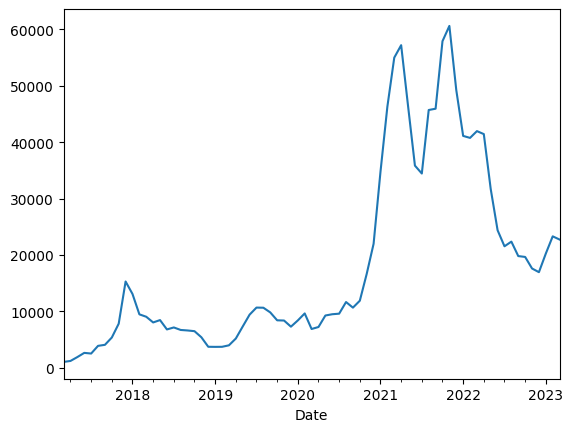

In [33]:
# Resample to a monthly frequency and get the mean of the closing prices

data['Close'].resample('M').mean()

#Plot the chart with these mean values
data['Close'].resample('M').mean().plot()

In [34]:
pd.date_range(start='2020-01-01', end='2023-01-01', freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=783, freq='B')

## Stock price analysis for the year 2017

In [35]:
# Select one year's open and close prices to check the comparisions

year_17 = data.loc["2017-03-17":"2017-12-31", "Open":"Close"]
year_17.reset_index(inplace=True)


In [36]:
#Groupby and aggregate the mean of the monthvise prices

months_17= year_17.groupby(year_17['Date'].dt.strftime('%B'))[['Open','Close']].mean()
months_17= months_17.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'], axis=0)

months_17

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,1040.029989,1032.094804
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


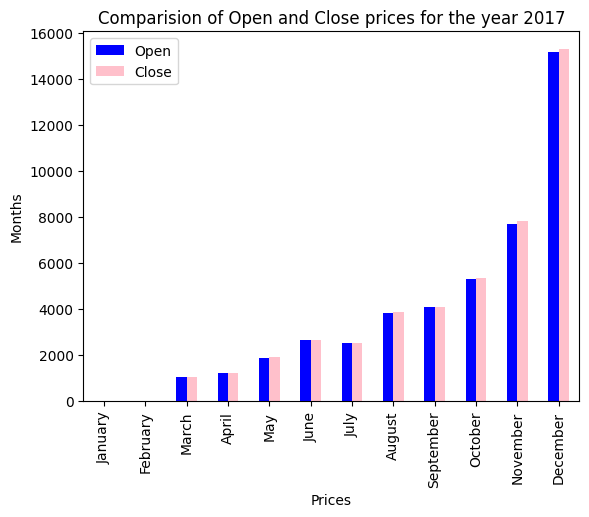

In [37]:
months_17.plot(kind='bar', y =months_17.columns, color=['blue', 'pink'])
plt.xlabel('Prices')
plt.ylabel('Months')
plt.title('Comparision of Open and Close prices for the year 2017')
plt.legend(['Open', 'Close'])
plt.show()

In [38]:
!pip install --upgrade "kaleido==0.1.*"

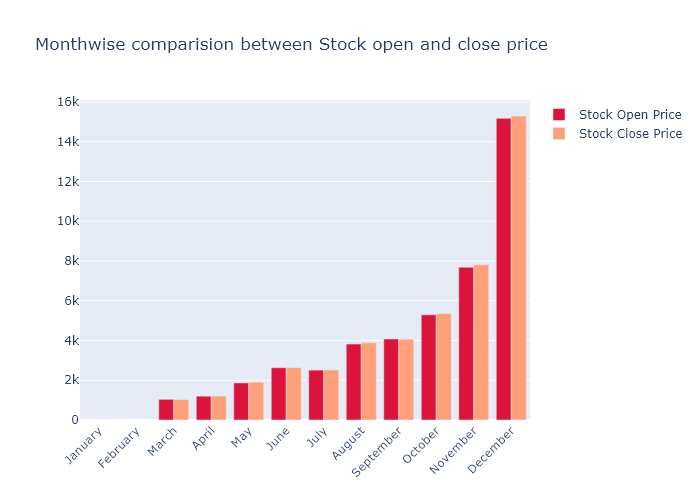

In [39]:
# Or we can make use of plotly to compare the columns

fig = go.Figure()

fig.add_trace(go.Bar(
    x=months_17.index,
    y=months_17['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=months_17.index,
    y=months_17['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show('png')
fig.write_image('fig.png', engine='kaleido')

In [40]:
#Comparing the High and Low prices 

months_17_high = year_17.groupby(year_17['Date'].dt.strftime('%B'))['High'].max()
months_17_high = months_17_high.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'], axis=0)

months_17_low = year_17.groupby(year_17['Date'].dt.strftime('%B'))['Low'].min()
months_17_low = months_17_low.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'], axis=0)

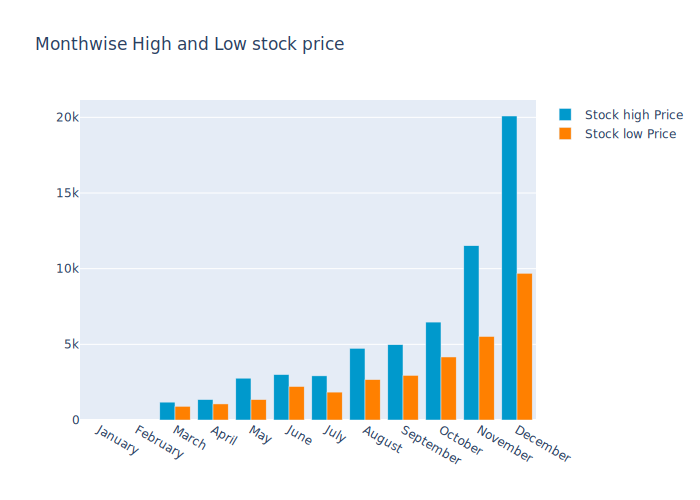

In [41]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=months_17_high.index,
    y=months_17_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=months_17_low.index,
    y=months_17_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show('svg')

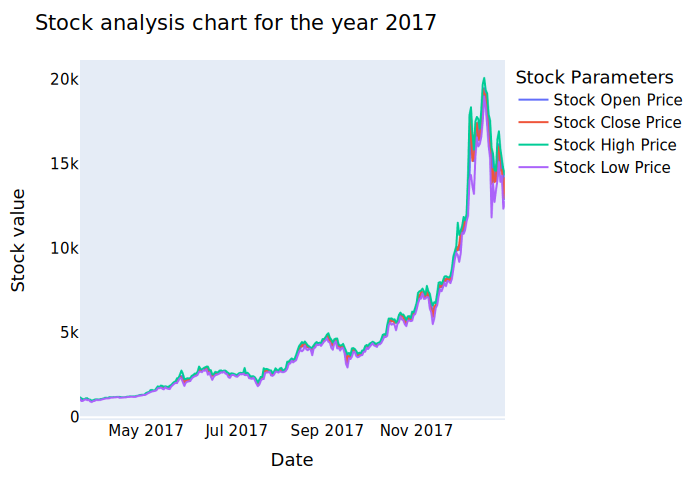

In [42]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(year_17, x=year_17.Date, y=[year_17['Open'], year_17['Close'], 
                                          year_17['High'], year_17['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart for the year 2017', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show('svg')

## Stock price analysis for the year 2018

In [43]:
# For the year 2018
year_18 = data.loc["2018-01-01":"2018-12-31","Open":"Close"]
year_18.reset_index(inplace=True)
year_18

,Date,Open,High,Low,Close
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
...,...,...,...,...,...
360,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496
361,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701
362,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691
363,2018-12-30,3822.384766,3901.908936,3797.219238,3865.952637


In [44]:
# Groupby months and aggregate the means of open and close prices of each month

months_18 = year_18.groupby(year_18['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
months_18 = months_18.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'], axis=0)
months_18

,Open,Close
Date,,
January,13212.074219,13085.558090
February,9462.242920,9472.001151
March,9156.591718,9040.557097
April,7963.618311,8033.596631
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


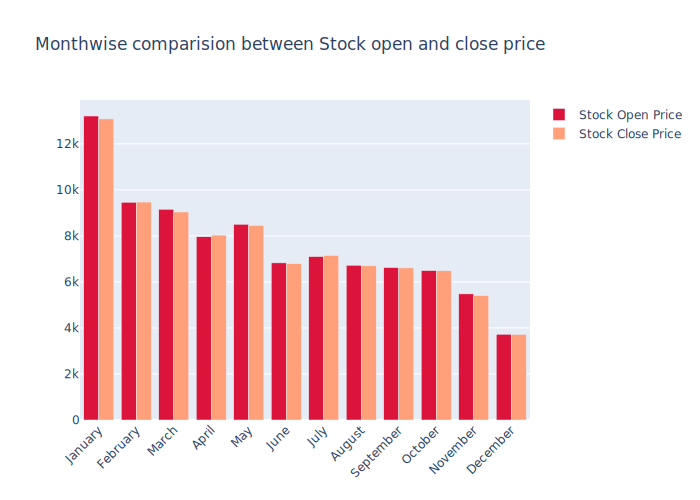

In [45]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = months_18.index,
    y = months_18['Open'],
    name= 'Stock Open Price',
    marker_color='crimson'
))

fig.add_trace(go.Bar(
    x=months_18.index,
    y=months_18['Close'],
    name = 'Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode= 'group', xaxis_tickangle =-45,
                  title = 'Monthwise comparision between Stock open and close price')

fig.show('svg')

In [46]:
# Groupby by high and low prices
months_18_high = year_18.groupby(year_18['Date'].dt.strftime('%B'))['High'].max()
months_18_high = months_18_high.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'], axis=0)

months_18_low = year_18.groupby(year_18['Date'].dt.strftime('%B'))['Low'].min()
months_18_low = months_18_low.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'], axis=0)

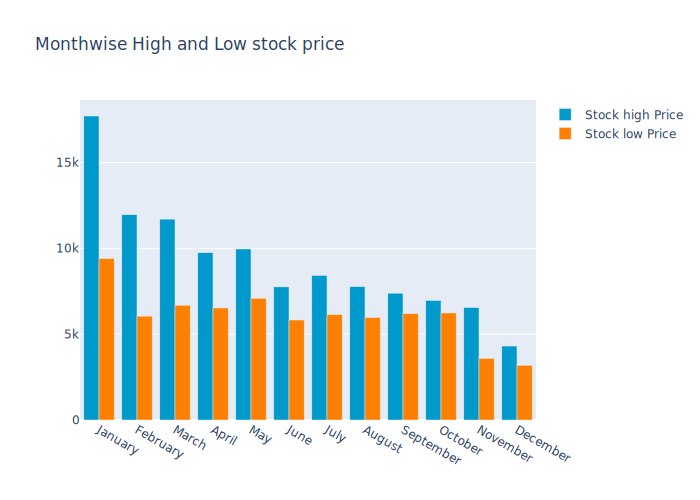

In [47]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=months_18_high.index,
    y = months_18_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=months_18_low.index,
    y=months_18_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show('svg')



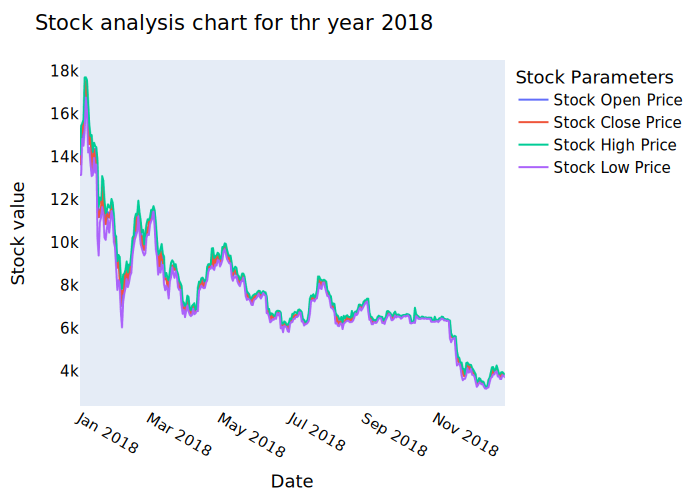

In [48]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(year_18, x= year_18['Date'], y = [year_18['Open'], year_18['Close'], year_18['High'], year_18['Low']],
                 labels={'Date': 'Date','value':'Stock value'})

fig.update_layout(title_text= 'Stock analysis chart for thr year 2018', font_size= 15, font_color='black', 
                  legend_title_text= 'Stock Parameters')
fig.for_each_trace(lambda t: t.update(name= next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show('svg')

Note that the above mentioned analysis can be done to all the years, if you want to analyse and make better predictions. But I am continuing with the overall analysis of data

## Overall analysis of the data

In [49]:
df = data.reset_index()
df= df.loc[0:2190, 'Date':'Close']
df

,Date,Open,High,Low,Close
0,2017-03-17,1180.160034,1180.160034,1099.569946,1100.229980
1,2017-03-18,1099.689941,1114.069946,957.655029,973.817993
2,2017-03-19,976.729980,1069.910034,976.729980,1036.739990
3,2017-03-20,1037.239990,1063.030029,1036.680054,1054.229980
4,2017-03-21,1055.359985,1122.430054,1055.359985,1120.540039
...,...,...,...,...,...
2186,2023-03-12,20628.029297,22185.031250,20448.806641,22163.949219
2187,2023-03-13,22156.406250,24550.837891,21918.199219,24197.533203
2188,2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219
2189,2023-03-15,24770.925781,25240.615234,23964.910156,24375.960938


In [50]:
monthvise = df.groupby(df['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
monthvise= monthvise.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December'], axis=0)
monthvise

,Open,Close
Date,,
January,20217.604125,20217.195558
February,22024.014400,22123.876456
March,21442.356707,21514.077084
April,20065.766641,20047.537352
May,17636.749762,17511.436504
June,14833.832342,14760.613262
July,14246.785849,14318.205316
August,16804.740460,16825.341915
September,16185.212899,16149.067798


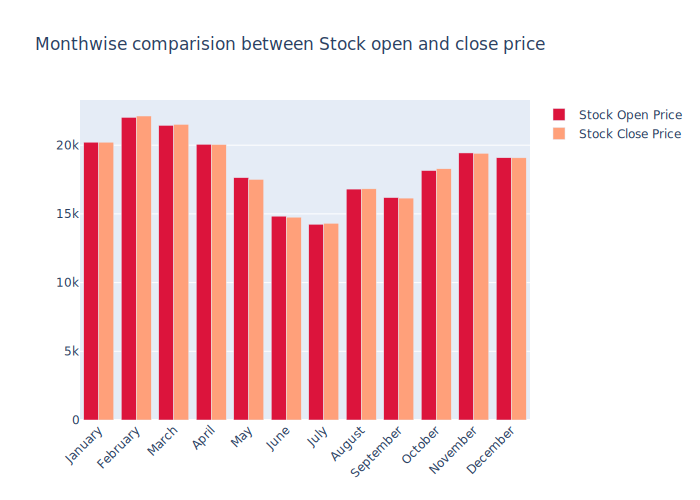

In [51]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x= monthvise.index,
    y=monthvise['Open'],
    name= 'Stock Open Price',
    marker_color='crimson'
))

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name = 'Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode= 'group', xaxis_tickangle =-45,
                  title = 'Monthwise comparision between Stock open and close price')

fig.show('svg')


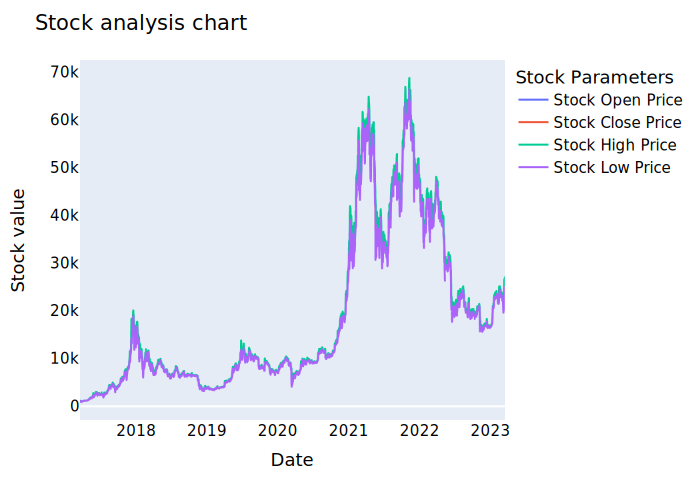

In [52]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(df, x=df['Date'], y=[df['Open'], df['Close'], 
                                          df['High'], df['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show('svg')

## Building LSTM model

In [53]:
## As we want to predict Close Price of the Bitcoin so we are just Considering Close aand Date
## Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape) 

close_stock = closedf.copy()

Shape of close dataframe: (2191, 2)


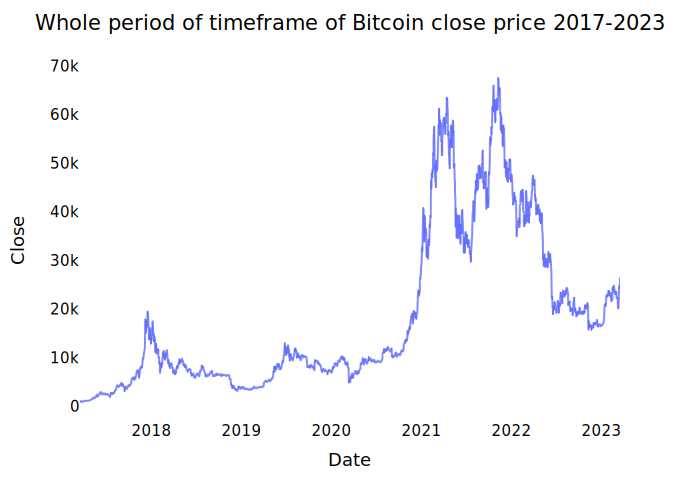

In [54]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close, labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='green')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2017-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show('svg')

In [55]:
# As there is not much variation in the years from 2017 to 2020 we consider the data only from the years greater than Oct 2020
closedf = closedf[closedf['Date'] >= '2020-10-01']
closedf.reset_index(drop=True, inplace=True)

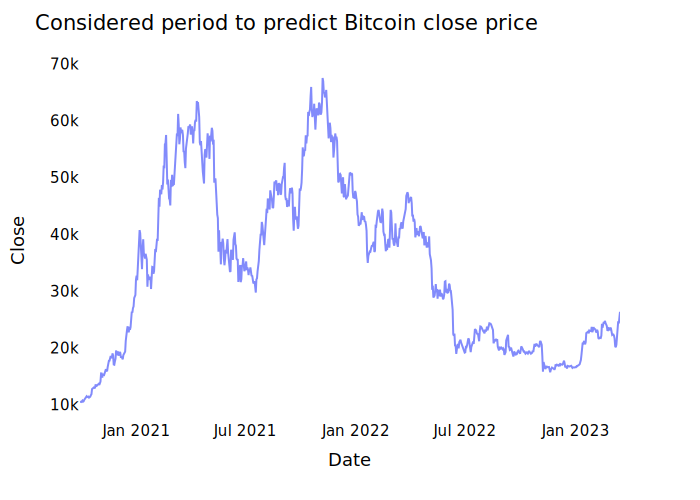

In [56]:
# Considered price to predict btc close price

fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show('svg')

In [57]:
# Normalise the Date column

del closedf['Date']
scaler = MinMaxScaler(feature_range=(0,1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))
closedf.shape

(897, 1)

In [58]:
#Slicing 60% of data for training and testing
train_set = closedf[0:int(len(closedf)*0.60)]
test_set = closedf[int(len(closedf)*0.60): len(closedf)] 

print("train_set :", train_set.shape)
print("test_set :", test_set.shape)

train_set : (538, 1)
test_set : (359, 1)


In [59]:
# Now we transform the close price based on time series analysis forecasting requirement, here i will take 15 time steps

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [60]:
time_step = 15

X_train, y_train = create_dataset(train_set , time_step)
X_test, y_test = create_dataset(test_set , time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)


X_train:  (522, 15)
y_train:  (522,)
X_test:  (343, 15)
y_test (343,)


In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (522, 15, 1)
X_test:  (343, 15, 1)


In [62]:
# Model building

model = Sequential()
model.add(LSTM(10, input_shape = (None,1), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'adam')



In [63]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=250, batch_size=32,verbose=1)

Epoch 1/250
17/17 [==============================] - 1s 17ms/step - loss: 0.5348 - val_loss: 0.0480
Epoch 2/250
17/17 [==============================] - 0s 5ms/step - loss: 0.3049 - val_loss: 0.0186
Epoch 3/250
17/17 [==============================] - 0s 5ms/step - loss: 0.1400 - val_loss: 0.0052
Epoch 4/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.0162
Epoch 5/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0092
Epoch 6/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0127
Epoch 7/250
17/17 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.0105
Epoch 8/250
17/17 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.0108
Epoch 9/250
17/17 [==============================] - 0s 6ms/step - loss: 0.0069 - val_loss: 0.0099
Epoch 10/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0098
Epoch 11

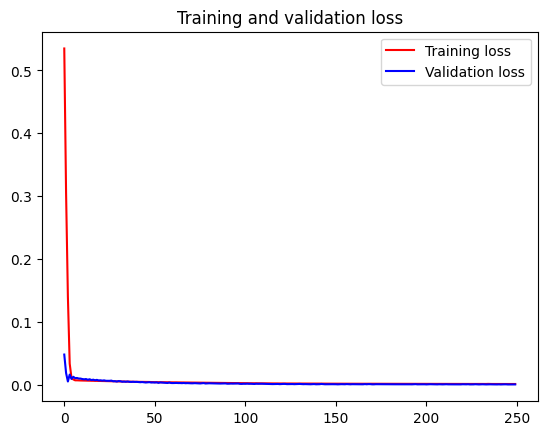

<Figure size 640x480 with 0 Axes>

In [64]:
# Plotting loss vs validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 [==============================] - 0s 1ms/step


((522, 1), (343, 1))

In [66]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [67]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1960.1126888496203
Train data MSE:  3842041.752989289
Train data MAE:  1481.2704124086445
-------------------------------------------------------------------------------------
Test data RMSE:  1340.177213040432
Test data MSE:  1796074.9623528195
Test data MAE:  1046.3867984231051


In [68]:
# Variance Regression score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9782750560701219
Test data explained variance regression score: 0.9738289741033409


In [69]:
# R-square regression score

print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9782640159924787
Test data R2 score: 0.9565333711513716


In [70]:
## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.002130732859784431
Test data MGD:  0.0032515717891780393
----------------------------------------------------------------------
Train data MPD:  87.09854393721118
Test data MPD:  74.71814270933969


In [71]:
# Comparision of original stock close price and predicted close price
# shift train predictions for plotting
''' 
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
'''

' \nlook_back=time_step\ntrainPredictPlot = np.empty_like(closedf)\ntrainPredictPlot[:, :] = np.nan\ntrainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict\nprint("Train predicted data: ", trainPredictPlot.shape)\n\n# shift test predictions for plotting\ntestPredictPlot = np.empty_like(closedf)\ntestPredictPlot[:, :] = np.nan\ntestPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict\nprint("Test predicted data: ", testPredictPlot.shape)\n\nnames = cycle([\'Original close price\',\'Train predicted close price\',\'Test predicted close price\'])\n\n\nplotdf = pd.DataFrame({\'date\': close_stock[\'Date\'],\n                       \'original_close\': close_stock[\'Close\'],\n                      \'train_predicted_close\': trainPredictPlot.reshape(1,-1)[0].tolist(),\n                      \'test_predicted_close\': testPredictPlot.reshape(1,-1)[0].tolist()})\n\nfig = px.line(plotdf,x=plotdf[\'date\'], y=[plotdf[\'original_close\'],plotdf[\'tra

In [72]:
# # Predicting next 30 days

x_input=test_set[len(test_set)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [73]:
# Plotting last 15 days of dataset and next predicted 30 days
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


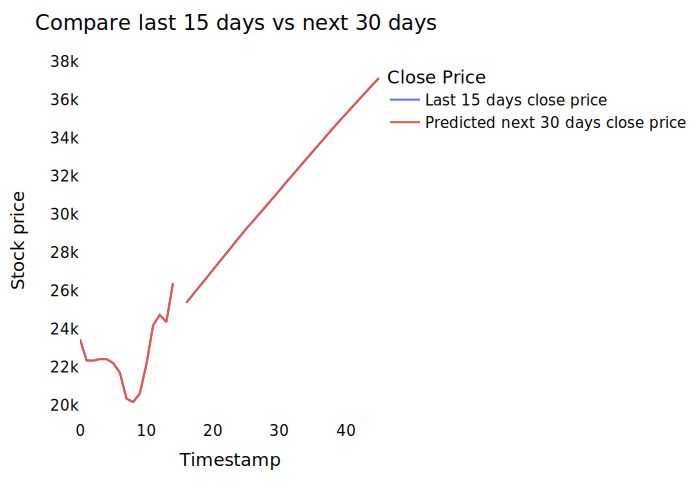

In [74]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show('svg')

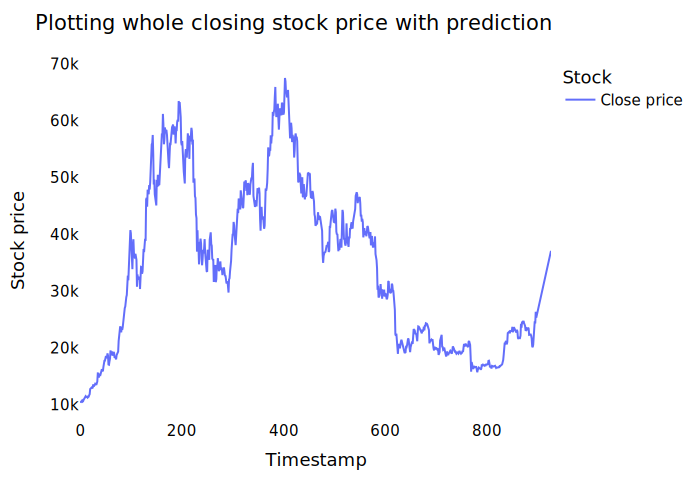

In [75]:
# Plotting entire Closing Stock Price with next 30 days period of prediction
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show('svg')
